# Assignment 3
## Question 1
Download the rock paper sissors data.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# download and extract rps data
tarball_path = "rps-data.tgz"
if not Path(tarball_path).is_file():
  url = "https://github.com/RochX/comp486-assignments/raw/main/assignment3/rps-data.tgz"
  urllib.request.urlretrieve(url, "rps-data.tgz")
  with tarfile.open(tarball_path) as rps_tarball:
    rps_tarball.extractall()

## Question 2

Convert the images into a csv file using the provided code.

We run `rm rps-training-data.csv` to delete the file if it already exists, since the provided code simply appends to this file.
If we don't delete it initialially, we can get duplicate data.

In [2]:
!rm rps-training-data.csv

rm: cannot remove 'rps-training-data.csv': No such file or directory


In [3]:
import csv
import numpy as np
import os
from PIL import Image, UnidentifiedImageError

def createFileList(myDir, format='.png'):
  fileList = []
  print(myDir)
  labels = []
  names = []
  keywords = {"paper": "1","rock": "2","scissors":"3"} # keys and values to be changed as needed
  for root, dirs, files in os.walk(myDir, topdown=True):
    for name in files:
      if name.endswith(format):
        fullName = os.path.join(root, name)
        fileList.append(fullName)
      for keyword in keywords:
        if keyword in name:
          labels.append(keywords[keyword])
        else:
          continue
      names.append(name)
  return fileList, labels, names

# load the original image
myFileList, labels, names = createFileList("rps-data/rps-training-set")
i = 0

failed_files = []
for file in myFileList:
  try:
    img_file = Image.open(file)
    #img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))
    value = value.flatten()
    value = np.append(value,labels[i])
    i +=1
    #print(value)
    with open("rps-training-data.csv", 'a') as f:
      writer = csv.writer(f)
      writer.writerow(value)
  except UnidentifiedImageError:
    failed_files.append(file)

print(f"Number of failed files: {len(failed_files)} out of {len(myFileList)}")
with open("failed_files.log", "w") as log_file:
  for file in failed_files:
    log_file.write(file + "\n")

rps-data/rps-training-set


<ipython-input-3-b589c28154ea>:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))


Number of failed files: 0 out of 2520


## Question 3
Use `read_csv` in `pandas` to read the CSV file and assign it to a variable and print it.

In [4]:
rps_training_data = pd.read_csv("rps-training-data.csv", header=None)
# rename the label column to be clearly distinguish between the image data and label
rps_training_data = rps_training_data.rename(columns={2304: "RPS Label"})
rps_training_data

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
0,254,254,253,253,253,253,253,253,253,253,...,248,248,249,249,250,250,250,250,251,3
1,255,255,255,255,255,255,255,255,255,255,...,253,254,254,254,254,254,254,254,254,2
2,255,255,255,255,255,255,255,255,255,255,...,214,255,252,254,254,254,254,254,254,2
3,253,253,253,253,253,253,253,253,253,253,...,246,246,247,247,248,248,248,248,249,3
4,253,253,253,253,253,253,253,252,252,252,...,246,246,247,247,248,248,248,249,249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,254,254,254,253,253,253,253,253,253,253,...,246,246,247,247,248,248,248,249,249,2
2516,253,253,253,253,253,253,253,253,253,253,...,247,247,247,248,249,249,249,249,250,3
2517,254,254,253,253,253,253,253,253,253,253,...,246,246,246,247,247,248,248,249,249,2
2518,255,255,255,255,255,255,255,255,255,255,...,255,254,254,254,254,254,254,254,254,2


## Question 4
Choose two methods to discover the data.

In [5]:
# get the set of values for the last column
rps_training_data["RPS Label"].value_counts()

3    840
2    840
1    840
Name: RPS Label, dtype: int64

In [6]:
rps_training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,...,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,253.978968,253.918254,253.816270,253.828571,253.794444,253.774206,253.782540,253.759524,253.724603,253.646429,...,236.407937,246.196429,249.318651,250.092857,250.341667,250.487302,250.548810,250.905952,251.093651,2.000000
std,0.884763,0.915041,0.955113,0.950949,0.962068,0.966391,0.972188,0.991482,1.027002,1.108982,...,45.437036,24.461682,8.978231,3.190291,2.913251,2.816584,2.712943,2.477105,2.285142,0.816659
min,253.000000,253.000000,253.000000,253.000000,253.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,0.000000,0.000000,0.000000,219.000000,246.000000,246.000000,247.000000,247.000000,247.000000,1.000000
25%,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,246.000000,247.000000,247.000000,248.000000,248.000000,248.000000,248.000000,249.000000,249.000000,1.000000
50%,254.000000,254.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,247.000000,248.000000,248.000000,249.000000,249.000000,249.000000,249.000000,250.000000,250.000000,2.000000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,3.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,254.000000,254.000000,254.000000,3.000000


## Question 5
Make sure your training data is shuffled.

In [7]:
from sklearn.utils import shuffle

rps_training_data_shuffled = shuffle(rps_training_data, random_state=42)

rps_training_data_shuffled

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
196,254,254,253,254,253,253,254,253,253,253,...,247,247,248,248,248,248,248,249,249,3
986,253,253,253,253,253,253,253,253,253,253,...,248,248,248,249,249,249,249,250,250,3
1090,255,255,255,255,255,255,255,255,255,255,...,203,255,252,254,254,254,253,253,253,1
387,255,255,255,255,255,255,255,255,255,255,...,255,252,254,254,254,254,254,254,254,1
2221,253,253,253,253,253,253,253,253,253,252,...,246,246,246,247,247,247,248,248,249,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,255,255,255,255,255,255,255,255,255,255,...,255,252,254,254,254,254,254,254,253,1
1095,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
1130,253,253,253,253,253,253,253,253,253,253,...,247,247,248,248,248,248,248,249,249,3
1294,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,2


## Question 6
Separate the predictors (`rpsPredictors`) and the labels (`rpsLabels`) in the training set

In [8]:
rps_training_predictors = rps_training_data_shuffled.drop("RPS Label", axis=1)
rps_training_labels = rps_training_data_shuffled["RPS Label"]

In [9]:
rps_training_predictors.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
196,254,254,253,254,253,253,254,253,253,253,...,247,247,247,248,248,248,248,248,249,249
986,253,253,253,253,253,253,253,253,253,253,...,247,248,248,248,249,249,249,249,250,250
1090,255,255,255,255,255,255,255,255,255,255,...,0,203,255,252,254,254,254,253,253,253
387,255,255,255,255,255,255,255,255,255,255,...,183,255,252,254,254,254,254,254,254,254
2221,253,253,253,253,253,253,253,253,253,252,...,245,246,246,246,247,247,247,248,248,249


In [10]:
rps_training_labels.head()

196     3
986     3
1090    1
387     1
2221    2
Name: RPS Label, dtype: int64

## Question 7
Display an instance's feature vector using `matplotlib`'s `imshow()` function and
check the label for that image. (If the picture is paper, then the label should be 1, if the
picture is a rock, then the label should be 2, and if the picture is scissors, then the label
should be 3)

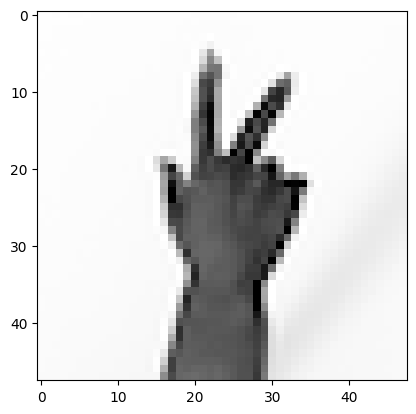

In [11]:
import matplotlib.pyplot as plt

def plot_rps(image_data):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# get instance with index, then display the image in grey-scale and get its label
index = 0
instance = rps_training_predictors.iloc[[index]]
label = rps_training_labels.iloc[[index]]

plot_rps(instance)
plt.show()

## Question 8
Train a binary classifier (a stochastic gradient descent (SGD)), to distinguish between just two classes, paper, and non-paper.

In [12]:
paper_train_labels = (rps_training_labels == 1)
paper_train_labels

196     False
986     False
1090     True
387      True
2221    False
        ...  
1638     True
1095     True
1130    False
1294    False
860      True
Name: RPS Label, Length: 2520, dtype: bool

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf_paper = SGDClassifier(random_state=42)
sgd_clf_paper.fit(rps_training_predictors, paper_train_labels)

SGDClassifier(random_state=42)

## Question 9
Try to feed your model with some instants and **explain** the output.

In [14]:
rps_training_predictors[:8]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
196,254,254,253,254,253,253,254,253,253,253,...,247,247,247,248,248,248,248,248,249,249
986,253,253,253,253,253,253,253,253,253,253,...,247,248,248,248,249,249,249,249,250,250
1090,255,255,255,255,255,255,255,255,255,255,...,0,203,255,252,254,254,254,253,253,253
387,255,255,255,255,255,255,255,255,255,255,...,183,255,252,254,254,254,254,254,254,254
2221,253,253,253,253,253,253,253,253,253,252,...,245,246,246,246,247,247,247,248,248,249
168,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254
1378,253,253,253,253,253,253,253,253,253,253,...,246,247,247,248,248,249,249,249,250,250
2462,253,253,253,253,253,253,253,253,253,253,...,246,247,247,248,249,249,249,249,250,250


In [15]:
rps_training_labels[:8]

196     3
986     3
1090    1
387     1
2221    2
168     1
1378    3
2462    3
Name: RPS Label, dtype: int64

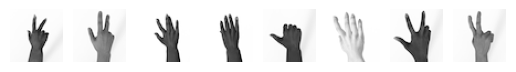

In [16]:
import matplotlib.pyplot as plt

rps_training_example_instances = rps_training_predictors[:8]

plot_rows, plot_columns = 1, len(rps_training_example_instances)

def subplot_rps(image_data, index):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.subplot(plot_rows, plot_columns, index)
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  plt.axis("off")


for i in range(len(rps_training_example_instances)):
  subplot_rps(rps_training_predictors.iloc[[i]], i+1)


plt.show()

In [17]:
sgd_clf_paper.predict(rps_training_example_instances)

array([False, False,  True,  True, False,  True, False, False])

The result of `sgd_clf_paper.predict(rps_training_example_instances)` tells us that the binary classifier determined that images 3, 4, 5, 6, 7 are all paper while the rest are not paper.

## Question 10
Use the `cross_val_score()` function to evaluate your SGDClassifier model, using $k$-fold cross-validation with five folds. **Write** your observations.

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_paper, rps_training_predictors, rps_training_labels, cv=5, scoring="accuracy")

array([0.65277778, 0.99206349, 0.99801587, 0.99603175, 1.        ])

The results of the `cross_val_score()` function with 5 folds tells us that the model is at least 98% accurate across all different folds.

## Question 11
Compute the confusion matrix for your classifier and **explain** the output.

In [19]:
from sklearn.model_selection import cross_val_predict

rps_training_paper_predictions = cross_val_predict(sgd_clf_paper, rps_training_predictors, paper_train_labels, cv=5)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(paper_train_labels, rps_training_paper_predictions)

array([[1656,   24],
       [  28,  812]])

The confusion matrix tells us the following:
- There are 1,651 instances that are not paper which the model correctly predicted.
- There are 29 instances that are not paper which the model incorrectly predicted to be paper.
- There are 123 instances that are paper which the model incorrectly predicted to not be paper.
- There are 717 instances that are paper which the model correctly predicted.

## Question 12
Calculate precision score, recall score and F1 score.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(paper_train_labels, rps_training_paper_predictions)

0.9712918660287081

In [22]:
recall_score(paper_train_labels, rps_training_paper_predictions)

0.9666666666666667

In [23]:
f1_score(paper_train_labels, rps_training_paper_predictions)

0.9689737470167064

## Question 13
Use `matplotlib` to plot precision and recall as functions of the threshold value.
**Write** your observations.

In [24]:
paper_scores = cross_val_predict(sgd_clf_paper, rps_training_predictors, paper_train_labels, cv=5, method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(paper_train_labels, paper_scores)

thresholds.min(), thresholds.max()

(-64385744.11393158, 41153707.240496434)

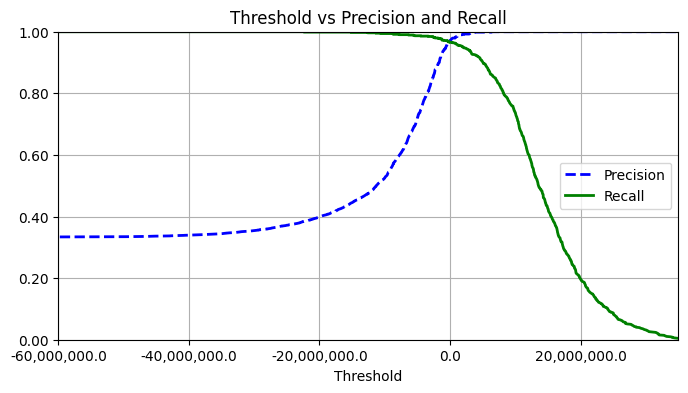

In [27]:
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# visual changes
plt.axis([-60000000, 35000000, 0, 1])
plt.ticklabel_format(style='plain')

# get current axis
ax = plt.gca()

# title
ax.set_title("Threshold vs Precision and Recall")

# x axis
ax.set_xlabel('Threshold')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:,}'.format(x))) # thousands comma seperator

# y axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points

plt.grid()
plt.legend(loc="center right")

plt.show()

When the threshold is positive, our precision approaches 100%.
A precision of 100% would mean that the model does not incorrectly classify rock or scissors as paper.

When the threshold is less than -20,000,000, our recall is nearly 100%.
A recall of 100% would mean that the model does not incorrectly classify paper as rock or scissors.

## Question 14
For what threshold you can get 95% precision?

In [28]:
threshold = 0.95

In [29]:
idx_for_threshold_precision = (precisions >= threshold).argmax()
desired_precision_threshold = thresholds[idx_for_threshold_precision]
desired_precision_threshold

-621414.5573912968

A threshold of `-185113` gives 95% precision.
The plot below shows this threshold.
Note the change of scale in the $x$-axis compared to the previous plot.

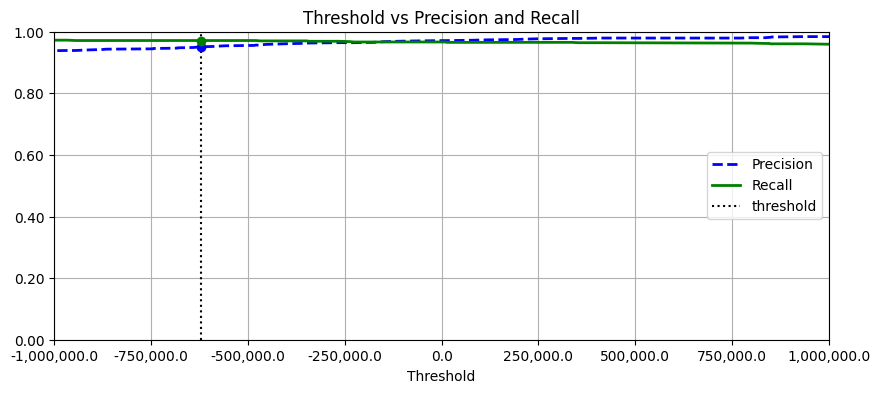

In [30]:
plt.figure(figsize=(10, 4))

# plot data and the threshold that gives us 95% precision
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(desired_precision_threshold, 0, 1.0, "k", "dotted", label="threshold")

# visual changes
plt.plot(thresholds[idx_for_threshold_precision], precisions[idx_for_threshold_precision], "bo")
plt.plot(thresholds[idx_for_threshold_precision], recalls[idx_for_threshold_precision], "go")
plt.axis([-1000000, 1000000, 0, 1])
plt.ticklabel_format(style='plain')

# get current axis
ax = plt.gca()

# title
ax.set_title("Threshold vs Precision and Recall")

# x axis
ax.set_xlabel('Threshold')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:,}'.format(x))) # thousands comma seperator on x-axis

# y axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points on y-axis

plt.grid()
# plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

## Question 15
plot the ROC curve (FPR against the TPR) using `matplotlib` then calculate the area under the curve (AUC). Is your classifier perfect? Why?

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(paper_train_labels, paper_scores)

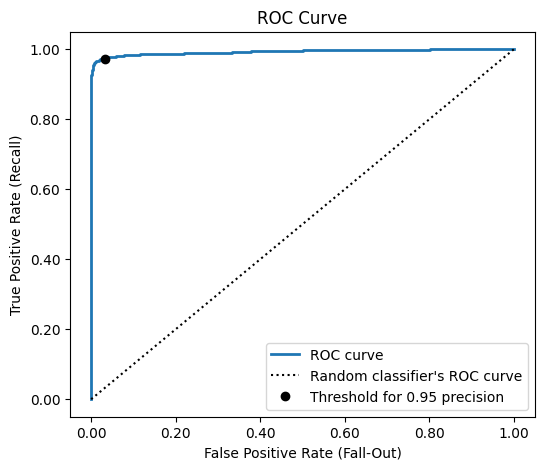

In [32]:
idx_for_desired_threshold = (thresholds <= desired_precision_threshold).argmax()
tpr_desired, fpr_desired = tpr[idx_for_desired_threshold], fpr[idx_for_desired_threshold]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_desired], [tpr_desired], "ko", label=f"Threshold for {threshold} precision")

# get current axes
ax = plt.gca()

ax.set_title("ROC Curve")

# x axis
ax.set_xlabel("False Positive Rate (Fall-Out)")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points

# y axis
ax.set_ylabel("True Positive Rate (Recall)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points

ax.legend()

plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(paper_train_labels, paper_scores)

0.9929577664399093

The area under the curve is approximately `0.97`.
Our classifier is not perfect because if it was, the area under the curve would be exactly `1.00`.

## Question 16
Train an SGDClassifier on a multiclass dataset and use it to make predictions.

In [34]:
sgd_clf_multiclass = SGDClassifier(random_state=42)
sgd_clf_multiclass.fit(rps_training_predictors, rps_training_labels)

SGDClassifier(random_state=42)

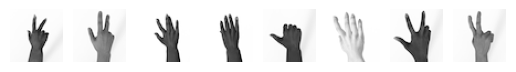

In [35]:
import matplotlib.pyplot as plt

rps_training_example_instances = rps_training_predictors[:8]

plot_rows, plot_columns = 1, len(rps_training_example_instances)

def subplot_rps(image_data, index):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.subplot(plot_rows, plot_columns, index)
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  plt.axis("off")


for i in range(len(rps_training_example_instances)):
  subplot_rps(rps_training_predictors.iloc[[i]], i+1)


plt.show()

In [36]:
sgd_clf_multiclass.predict(rps_training_example_instances)

array([3, 3, 1, 1, 2, 1, 3, 3])

Recall that paper is 1, rock is 2, and scissors is 3.
So for these instances, our multiclassifier correctly predicted all examples.

## Question 17
Plot the confusion matrix for your multiclass classifier and **explain** the output.

In [42]:
rps_training_predictions = cross_val_predict(sgd_clf_paper, rps_training_predictors, rps_training_labels, cv=5)


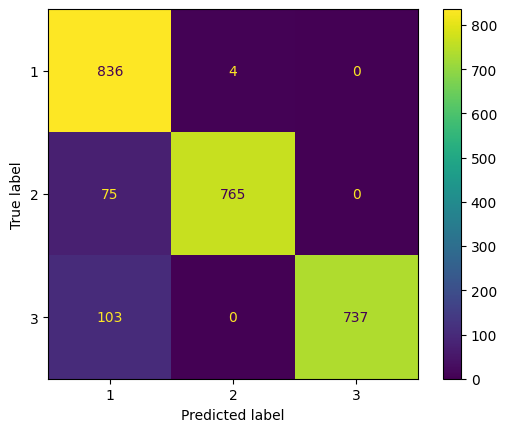

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(rps_training_labels, rps_training_predictions)

plt.show()

The confusion matrix for the multiclassifier tells us the following:
- 836 images of paper were correctly predicted to be paper.
  The other 4 images of paper were incorrectly predicted to be rock.
  No images of paper were incorrectly predicted to be scissors.
- 765 images of rock were correctly predicted to be rock.
  The other 75 images of rocks were incorrectly predicted to be paper.
  No images of rock were incorrectly predicted to be scissors.
- 737 images of scissors were correctly predicted to be scissors.
  The other 103 images of scissors were incorrectly predicted to be paper.
  No images of scissors were incorrectly predicted to be rock.




## Question 18
Plot Confusion matrix with errors only, normalized by row and confusion matrix with errors only by column. **Explain one output for each.**

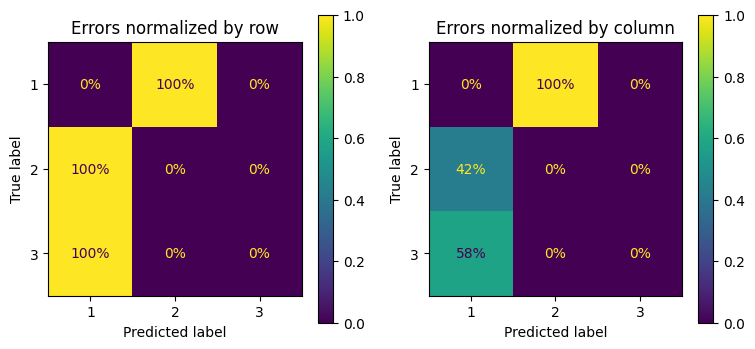

In [46]:
sample_weight = (rps_training_predictions != rps_training_labels)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)

# errors normalized by row
ConfusionMatrixDisplay.from_predictions(rps_training_labels, rps_training_predictions, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")

# errors normalized by column
ConfusionMatrixDisplay.from_predictions(rps_training_labels, rps_training_predictions, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)  # make fonts great again

When errors are normalized by row, we can see that for each label there was only one category that the images were incorrectly predicted to be.

When errors are normalized by column, we can see that there `42%` of the incorrectly predicted paper images were rock while `58%` of the incorrectly predicted paper images were scissors.